In [1]:
# TODO: Optimize MCMC code to run faster using parallelization or multithreading
# TODO: Add detailed docstrings to all functions and classes for better code documentation
# TODO: Implement unit tests
# TODO: Add more flexible parameter grid options for the models
# TODO: Investigate old code to understand why Spearman's rho used to be higher and orders were closer to the ideal order

import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

### TRANSITION MATRIX demo

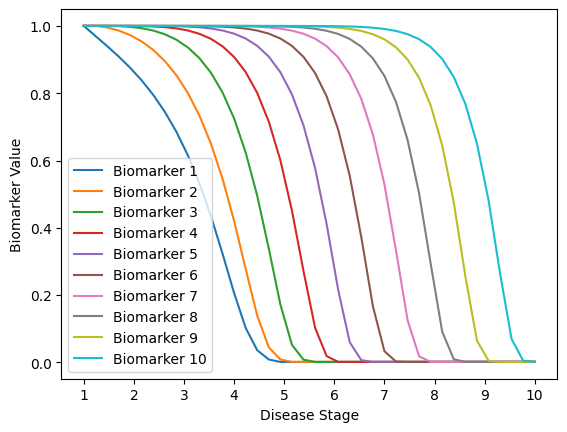

In [2]:
import sys
import os

# set the path to the parent directory of 'simulation_class'
parent_dir = os.path.abspath(os.path.join(os.getcwd(), os.pardir))
sys.path.append(parent_dir)

from simulation_class.canonical_generator import CanonicalGenerator
from simulation_class.sample_generator import SampleGenerator
from simulation_class.disease_progression_analyzer import DiseaseProgressionAnalyzer
from simulation_class.EBMAnalyzer import EBMAnalyzer

# model parameters
n_biomarker_stages = 10
model_type = 'transition_matrix'
biomarkers_params_transition = {'coeff': 1.5e-1}

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type, biomarkers_params=biomarkers_params_transition)
canonical_generator.plot_disease_progression() # plot disease progression
prior = canonical_generator.get_prior()
# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std = 0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [3]:
print(canonical_generator.model_values.shape)
print(canonical_generator.biomarker_values.shape)

(10, 40)
(10, 10)


In [2]:
## NO PRIOR
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

NameError: name 'patient_samples' is not defined

In [2]:
## W/ PRIOR
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = prior)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

NameError: name 'patient_samples' is not defined

# Diffusion, RD, and ACP

k_ij: [0.49880433 0.64875642 0.4929031  0.92363574 0.70308569 0.69565567
 0.33395313 0.18388969 0.89884311 0.9999975 ]
gamma: [0.72291107 0.49724641 0.54179714 0.42611263 0.75172099 0.60089906
 0.69201215 0.5775176  0.70069119 0.46789398]
eta:[1.16288843 1.06291232 1.00426425 1.31742798 1.00649305 1.12739008
 1.08131896 1.08488236 1.48560987 1.4943938 ]


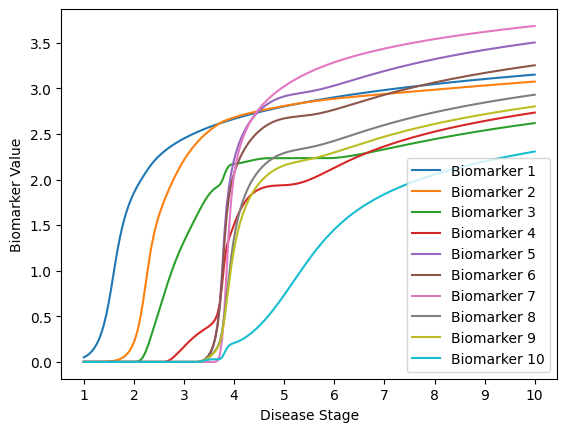

In [5]:
n_biomarker_stages = 10
model_type = 'acp'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [5]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

KeyboardInterrupt: 

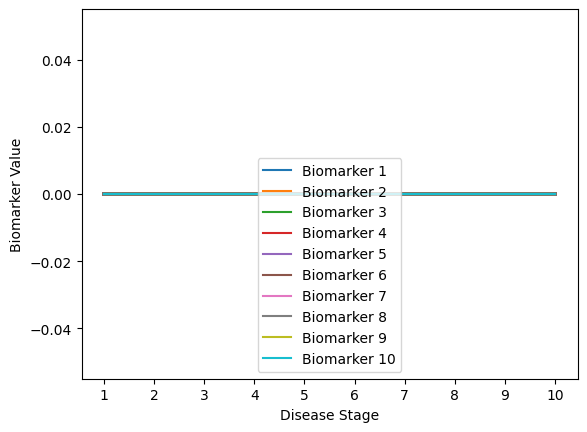

In [4]:
n_biomarker_stages = 10
model_type = 'diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

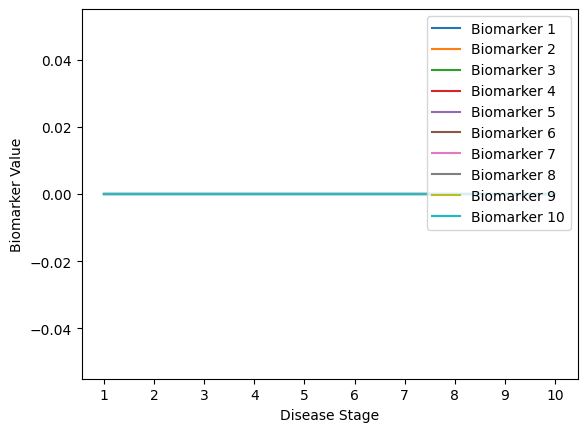

In [5]:
n_biomarker_stages = 10
model_type = 'reaction_diffusion'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

## ODE demo

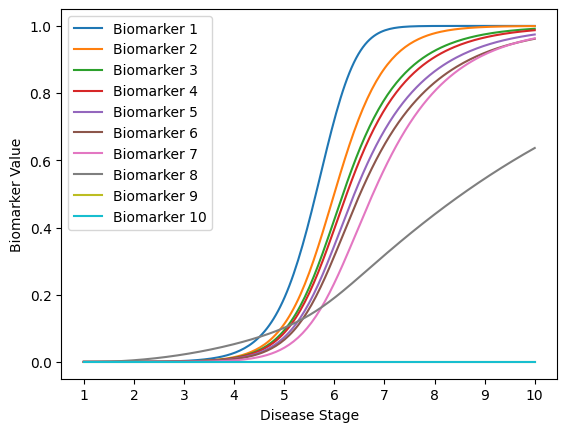

In [2]:
# TODO: add param grid options
# model parameters
n_biomarker_stages = 10
model_type = 'logistic'

# generate the canonical model
canonical_generator = CanonicalGenerator(n_biomarker_stages, model_type)
canonical_generator.plot_disease_progression()
prior = canonical_generator.get_prior()

# generate patient samples
sample_generator = SampleGenerator(canonical_generator, n_patients = 1000, add_noise=True, noise_std=0.1, random_state=2, skewness=-1)
patient_samples = sample_generator.patient_samples

In [10]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = None)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3529.06it/s]


Greedy Ascent Result: [0 3 2 1 4 5 6 7 8 9]


100%|██████████| 500000/500000 [02:20<00:00, 3552.85it/s]

Best Order: [0 3 2 1 4 5 6 7 8 9]
Spearman's Rho: None
Kendall's Tau: 0.8666666666666666


In [11]:
analyzer = DiseaseProgressionAnalyzer(patient_samples)
analyzer.set_prior(prior = prior)
likelihood_matrix = analyzer.run_analysis('ebm')
analyzer.ebm_analyzer.summary()

100%|██████████| 10000/10000 [00:02<00:00, 3598.63it/s]


Greedy Ascent Result: [0 3 2 1 4 5 6 7 8 9]


100%|██████████| 500000/500000 [02:20<00:00, 3548.22it/s]

Best Order: [0 3 2 1 4 5 6 7 8 9]
Spearman's Rho: None
Kendall's Tau: 0.8666666666666666
